# Data Visualization & Preprocessing

We start by importing the useful libraries the data.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv("InvestmentReplica.csv")
df.head()

,Date,MXWO,MXWD,LEGATRUU,HFRXGL,RX1,TY1,GC1,CO1,ES1,VG1,NQ1,LLL1,TP1,DU1,TU2
0,23/10/2007,1633.44,414.14,350.214,1343.63,113.70,110.516,759.0,82.85,1525.50,4393.0,2212.00,1287.0,1570.5,103.385,103.719
1,30/10/2007,1663.89,423.26,352.541,1356.53,113.79,110.656,787.8,87.44,1536.00,4476.0,2217.75,1323.9,1610.5,103.410,103.813
2,06/11/2007,1651.59,419.51,354.176,1360.20,113.79,110.875,823.4,93.26,1525.00,4425.0,2233.50,1320.0,1575.5,103.410,104.047
3,13/11/2007,1601.81,405.98,357.222,1347.16,114.35,111.719,799.0,88.83,1483.25,4323.0,2066.75,1271.0,1440.5,103.595,104.305
4,20/11/2007,1570.74,398.54,359.445,1335.21,114.72,113.156,791.4,95.49,1446.00,4296.0,2035.50,1225.2,1472.5,103.800,104.945


In [19]:
def price2ret(x):
    return x.pct_change()

def ret2price(x):
    return (1+x).cumprod()

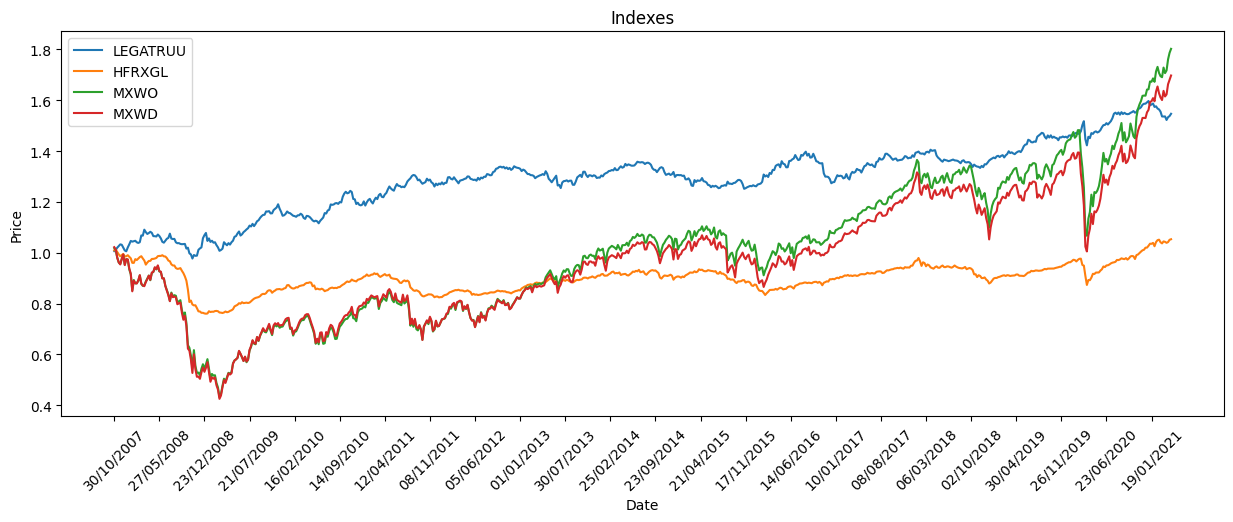

In [20]:
plt.figure(figsize=(15,5))
plt.plot(df['Date'][1:], df['LEGATRUU'][1:]/df['LEGATRUU'][0], label='LEGATRUU')
plt.plot(df['Date'][1:], df['HFRXGL'][1:]/df['HFRXGL'][0], label='HFRXGL')
plt.plot(df['Date'][1:], df['MXWO'][1:]/df['MXWO'][0], label='MXWO')
plt.plot(df['Date'][1:], df['MXWD'][1:]/df['MXWD'][0], label='MXWD')
plt.title('Indexes')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(df['Date'][1::30], rotation=45)
plt.show()

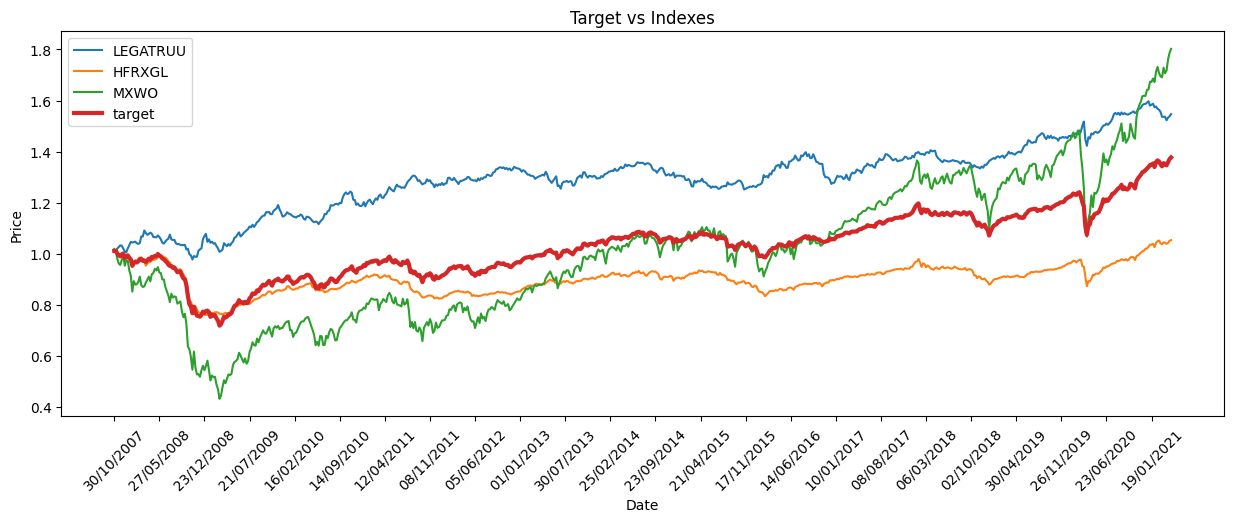

In [21]:
wHFRXGL = 0.5
wMXWO = 0.25
wLEGATRUU = 0.25

y = wHFRXGL*price2ret(df.HFRXGL) + wMXWO*price2ret(df.MXWO) + wLEGATRUU*price2ret(df.LEGATRUU)
target = (ret2price(y))
target = target.dropna()

plt.figure(figsize=(15,5))
plt.plot(df['Date'][1:], df['LEGATRUU'][1:]/df['LEGATRUU'][0], label='LEGATRUU')
plt.plot(df['Date'][1:], df['HFRXGL'][1:]/df['HFRXGL'][0], label='HFRXGL')
plt.plot(df['Date'][1:], df['MXWO'][1:]/df['MXWO'][0], label='MXWO')
plt.plot(df['Date'][1:], target, label='target',linewidth=3)
plt.title('Target vs Indexes')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(df['Date'][1::30], rotation=45)
plt.show()

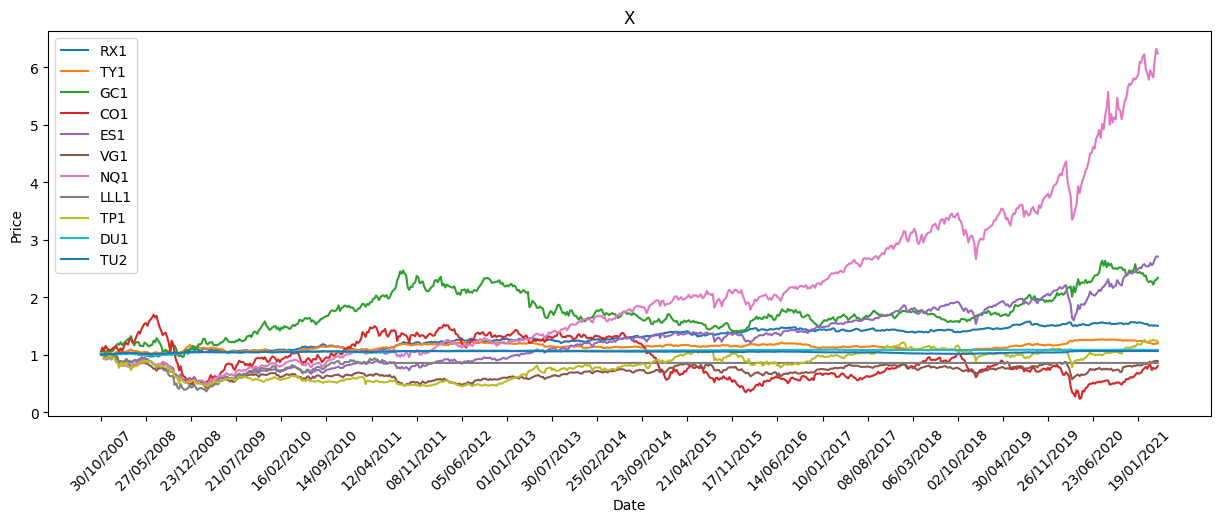

In [22]:
X = df[['RX1','TY1','GC1','CO1','ES1','VG1','NQ1','LLL1','TP1','DU1','TU2']]
X = price2ret(X)
X = X.dropna()

plt.figure(figsize=(15,5))
plt.plot(df['Date'][1:], ret2price(X.RX1), label='RX1')
plt.plot(df['Date'][1:], ret2price(X.TY1), label='TY1')
plt.plot(df['Date'][1:], ret2price(X.GC1), label='GC1')
plt.plot(df['Date'][1:], ret2price(X.CO1), label='CO1')
plt.plot(df['Date'][1:], ret2price(X.ES1), label='ES1')
plt.plot(df['Date'][1:], ret2price(X.VG1), label='VG1')
plt.plot(df['Date'][1:], ret2price(X.NQ1), label='NQ1')
plt.plot(df['Date'][1:], ret2price(X.LLL1), label='LLL1')
plt.plot(df['Date'][1:], ret2price(X.TP1), label='TP1')
plt.plot(df['Date'][1:], ret2price(X.DU1), label='DU1')
plt.plot(df['Date'][1:], ret2price(X.TU2), label='TU2')
plt.title('X')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(df['Date'][1::30], rotation=45)
plt.show()

X = ret2price(X)

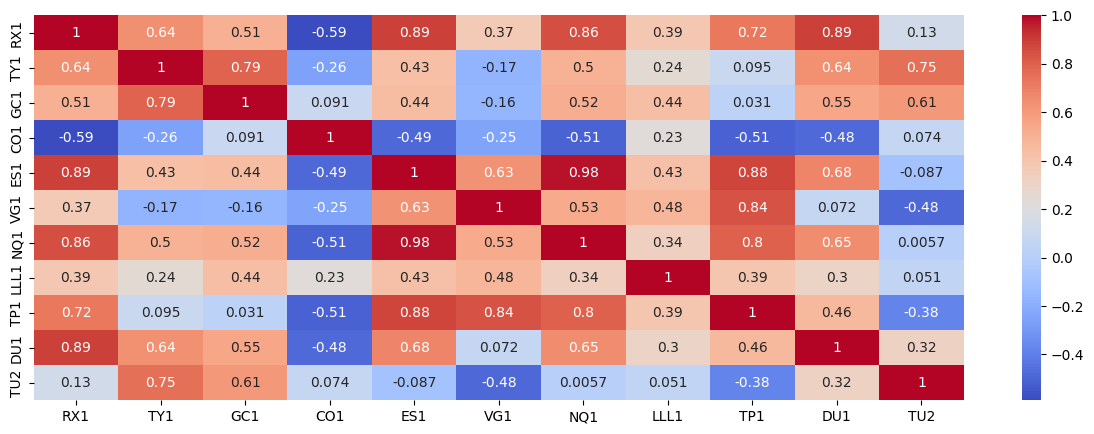

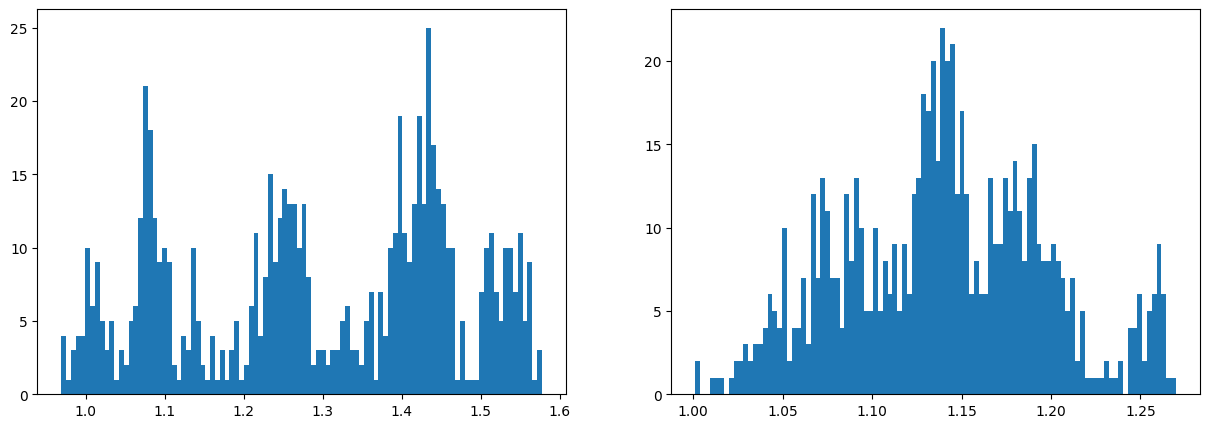

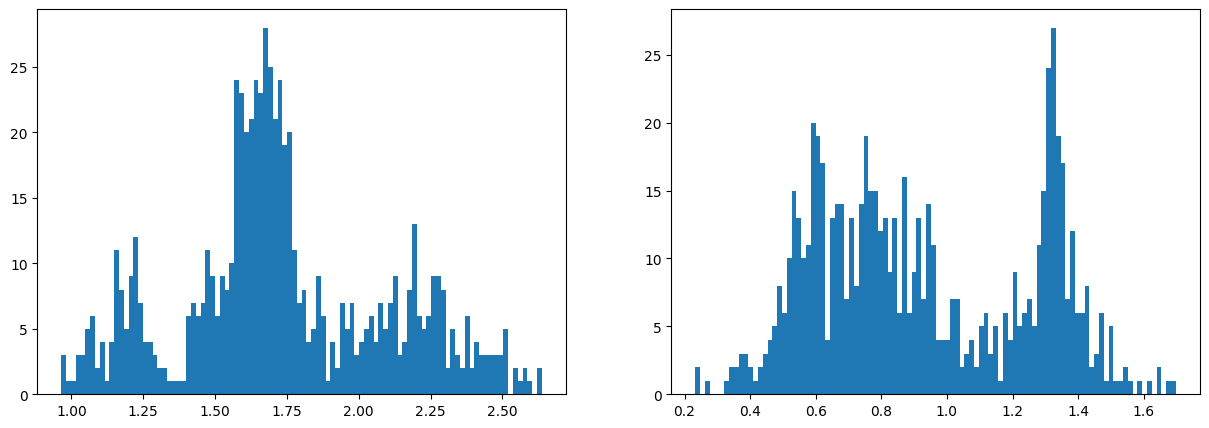

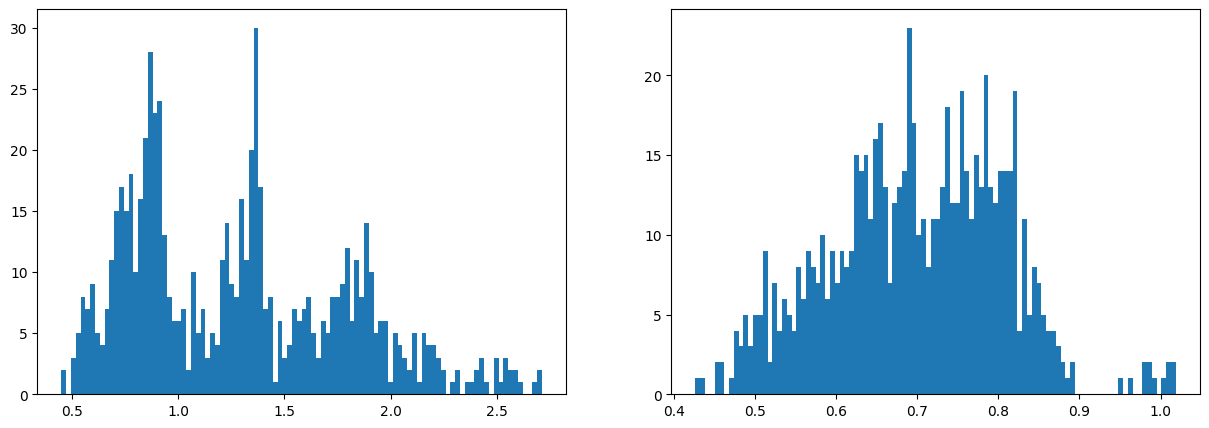

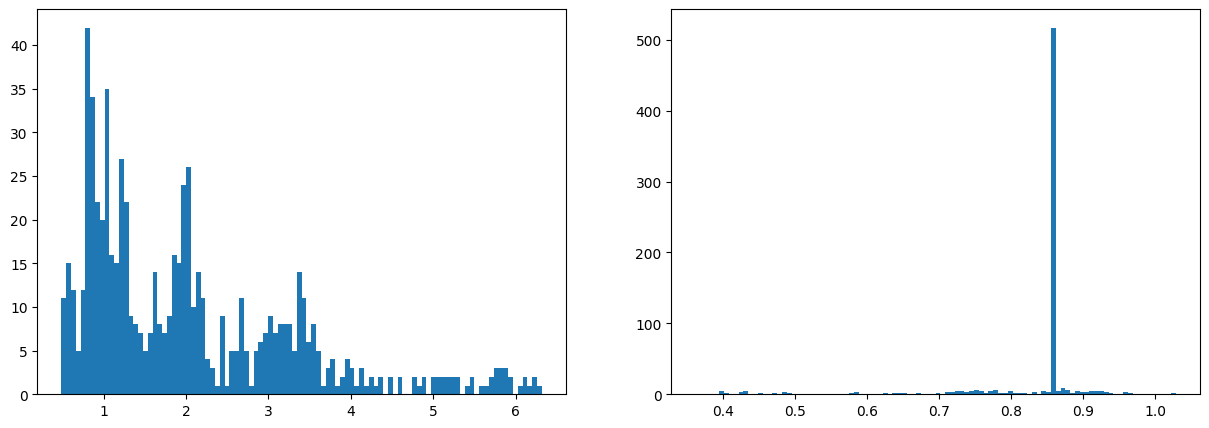

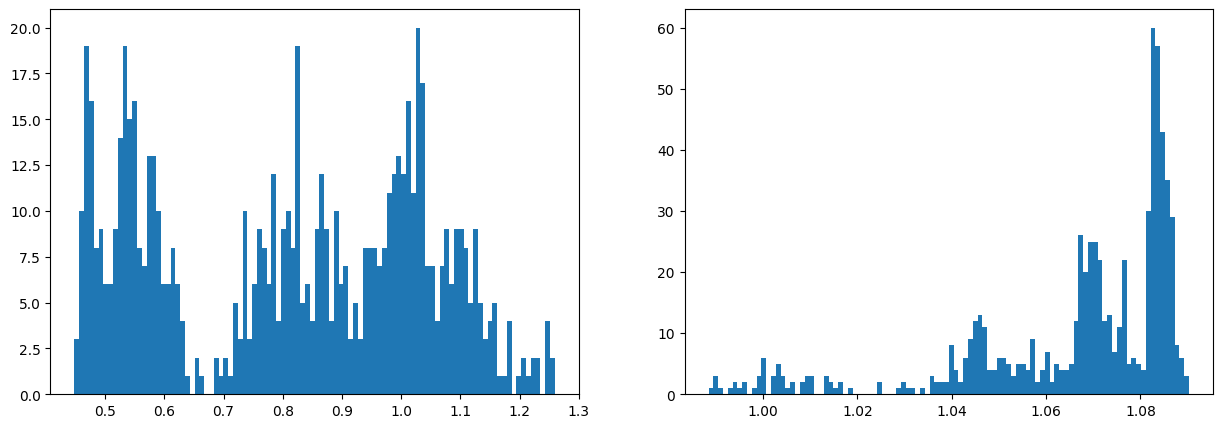

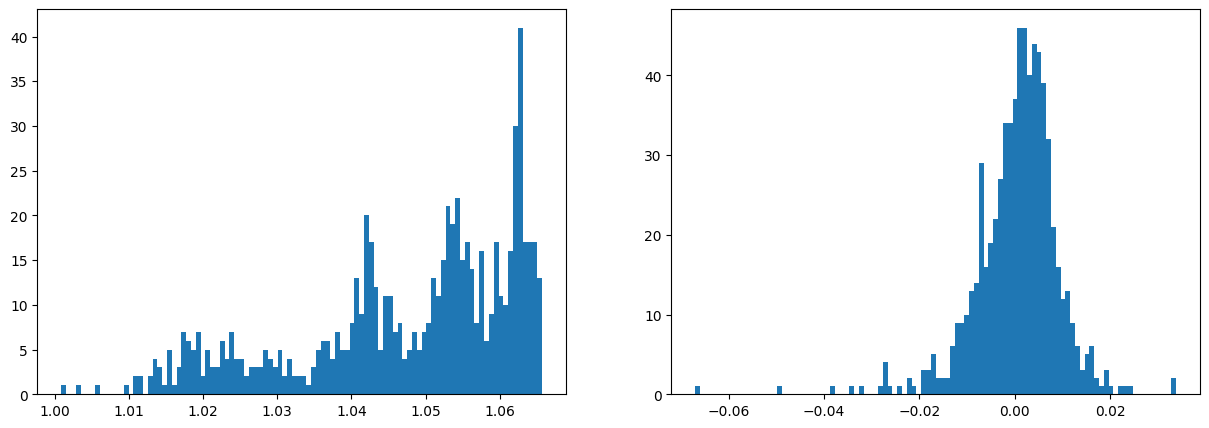

In [23]:
#plot delle correlazioni
plt.figure(figsize=(15,5))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

#plot delle distribuzioni, tutte 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(X.RX1, bins=100)

plt.subplot(1,2,2)
plt.hist(X.TY1, bins=100)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(X.GC1, bins=100)

plt.subplot(1,2,2)
plt.hist(X.CO1, bins=100)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(X.ES1, bins=100)

plt.subplot(1,2,2)
plt.hist(X.VG1, bins=100)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(X.NQ1, bins=100)

plt.subplot(1,2,2)
plt.hist(X.LLL1, bins=100)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(X.TP1, bins=100)

plt.subplot(1,2,2)
plt.hist(X.DU1, bins=100)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(X.TU2, bins=100)

plt.subplot(1,2,2) 
plt.hist(y, bins=100)

plt.show()